In [78]:
## Import libraries
# Data Manipulation
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations

# Data Visualization
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations
import seaborn as sns            # For statistical data visualization
from scipy.optimize import curve_fit

LabDataPart_a = pd.read_excel("Lab2 Part a.xlsx", skiprows = 1)

1. Calculate the average and standard deviation for the values of each data set and provide these in a table for each sensor. The accuracy of your position readings should correspond to the accuracy of the digimatic indicator. 

In [79]:
LabDataPart_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Time (s)                  149 non-null    int64  
 1   Reference Distance (mm)   149 non-null    float64
 2   Linear Potentiometer (V)  149 non-null    float64
 3   LVIT (V)                  149 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 4.8 KB


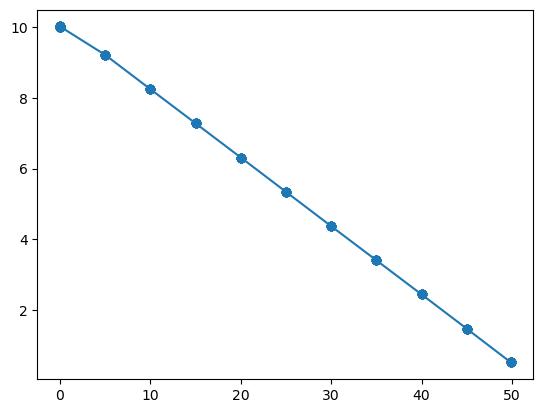

In [80]:
plt.plot(LabDataPart_a['Reference Distance (mm)'], LabDataPart_a['Linear Potentiometer (V)'], marker='o', label='Data Points')


In [81]:
# Group by Reference Distance and calculate mean values
averages = LabDataPart_a.groupby('Reference Distance (mm)')['Linear Potentiometer (V)', 'LVIT (V)'].mean()
stddev = LabDataPart_a.groupby('Reference Distance (mm)')['Linear Potentiometer (V)', 'LVIT (V)'].std()

# Display the results (Sensors are reporting data to 4 decimal places)
print("Average sensor readings for each reference distance:")
print(averages.round(4))
print("Standard Deviation for each reference distance:")
print(stddev.round(4))

averages = averages.reset_index()

Average sensor readings for each reference distance:
                         Linear Potentiometer (V)  LVIT (V)
Reference Distance (mm)                                    
0.00                                      10.0191   -0.0669
5.00                                       9.2165    0.6293
10.00                                      8.2466    1.5973
15.00                                      7.2812    2.5762
20.00                                      6.3151    3.5489
25.00                                      5.3428    4.5231
30.00                                      4.3738    5.4996
35.00                                      3.4092    6.4693
40.00                                      2.4439    7.4439
45.00                                      1.4740    8.4186
49.88                                      0.5210    9.3788
Standard Deviation for each reference distance:
                         Linear Potentiometer (V)  LVIT (V)
Reference Distance (mm)                                    

C:\Users\kylea\AppData\Local\Temp\ipykernel_21108\2551639990.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  averages = LabDataPart_a.groupby('Reference Distance (mm)')['Linear Potentiometer (V)', 'LVIT (V)'].mean()
C:\Users\kylea\AppData\Local\Temp\ipykernel_21108\2551639990.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stddev = LabDataPart_a.groupby('Reference Distance (mm)')['Linear Potentiometer (V)', 'LVIT (V)'].std()


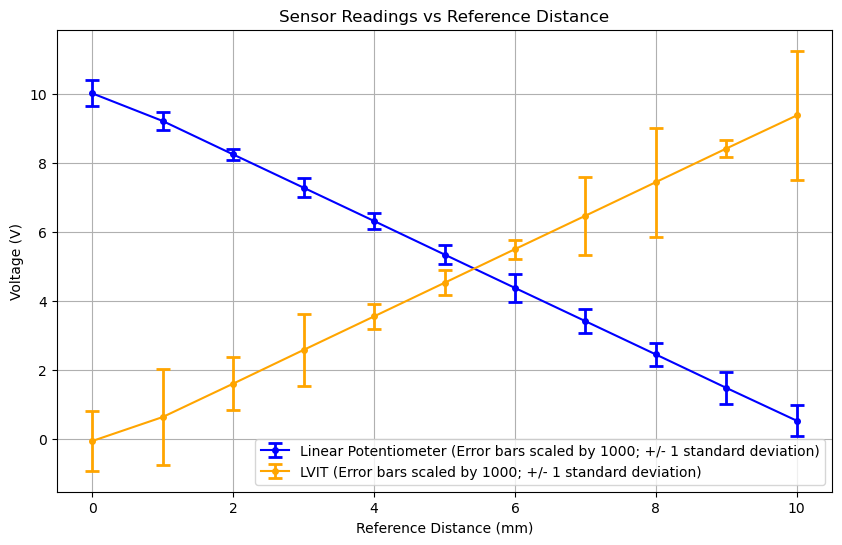

In [82]:
# Create the plot
plt.figure(figsize=(10, 6))

scale_factor = 1000

# Plot with scaled error bars
plt.errorbar(averages.index, averages['Linear Potentiometer (V)'], 
             yerr=stddev['Linear Potentiometer (V)'] * scale_factor,  # Scale up the error bars
             fmt='o-', label=f'Linear Potentiometer (Error bars scaled by {scale_factor}; +/- 1 standard deviation)',
             capsize=5,
             capthick=2,
             elinewidth=2,
             markersize=4,
             color='blue')

plt.errorbar(averages.index, averages['LVIT (V)'], 
             yerr=stddev['LVIT (V)'] * scale_factor,  # Scale up the error bars
             fmt='o-', label=f'LVIT (Error bars scaled by {scale_factor}; +/- 1 standard deviation)',
             capsize=5,
             capthick=2,
             elinewidth=2,
             markersize=4,
             color='orange')

# Customize the plot
plt.xlabel('Reference Distance (mm)')
plt.ylabel('Voltage (V)')
plt.title('Sensor Readings vs Reference Distance')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Fitted parameters: V0 = -0.06693923302564103, B0 = 0.18936855920259904
R^2 score: 1.00


c:\Users\kylea\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


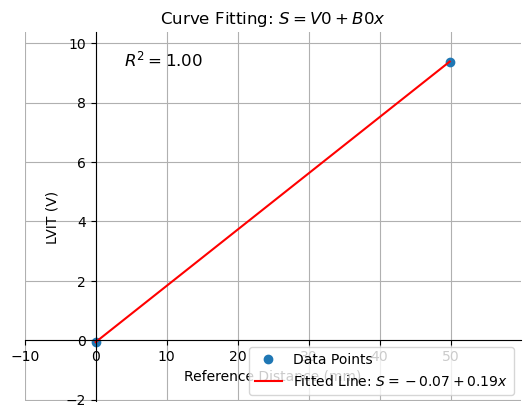

In [83]:
# Create a new DataFrame with the first and last rows using iloc (endpoints)
endpoints_df = averages.iloc[[0, -1]].copy()

#define the model function to fit
def model_function(x, V0, B0):
    #S = a + be^(cx)
    return  V0 + B0*x

#Initial guess
initial_guess = [1, -1]

# Use curve_fit to fit the model to the data
popt, pcov = curve_fit(model_function, endpoints_df['Reference Distance (mm)'], endpoints_df['LVIT (V)'], p0=initial_guess)

# Get the fitted parameters
V0_1, B0_1 = popt

# Formatted to 2 decimal places
V0_formatted = f'{V0_1:.2f}'
B0_formatted = f'{B0_1:.2f}'

# Calculate the fitted values using the original x-values
y_fit = model_function(endpoints_df['Reference Distance (mm)'], *popt)

# Calculate R^2 score manually
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

r2 = r2_score(endpoints_df['LVIT (V)'], y_fit)
r2_formatted = f'{r2:.2f}'

# Print fitted parameters and R^2 score
print(f"Fitted parameters: V0 = {V0_1}, B0 = {B0_1}")
print(f"R^2 score: {r2_formatted}")

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the data points and fitted curve
ax.plot(endpoints_df['Reference Distance (mm)'], endpoints_df['LVIT (V)'], marker='o', label='Data Points', linestyle='none')
ax.plot(endpoints_df['Reference Distance (mm)'], y_fit, label=rf'Fitted Line: $S = {V0_formatted} + {B0_formatted} x$', color='red')

# Move the x-axis and y-axis to intersect at zero
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Hide the top and right spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Set limits to ensure visibility
ax.set_xlim(min(endpoints_df['Reference Distance (mm)']) - 10, max(endpoints_df['Reference Distance (mm)']) + 10)
ax.set_ylim(min(endpoints_df['LVIT (V)']) - 2, max(endpoints_df['LVIT (V)']) + 1)

# Set labels and title
ax.set_xlabel('Reference Distance (mm)')
ax.set_ylabel('LVIT (V)')
ax.set_title(rf'Curve Fitting: $S = V0 + B0x$')

# Show the grid
ax.grid(True)

# Add the R^2 score as text annotation
ax.text(0.2, 0.9, f'$R^2 = {r2_formatted}$', transform=ax.transAxes, fontsize=12, verticalalignment='bottom')

# Display the legend
ax.legend(loc = 'lower right')

# Show the plot
plt.show()

Fitted parameters: V0 = 10.019057692307692, B0 = -0.19041810043118867
R^2 score: 1.00


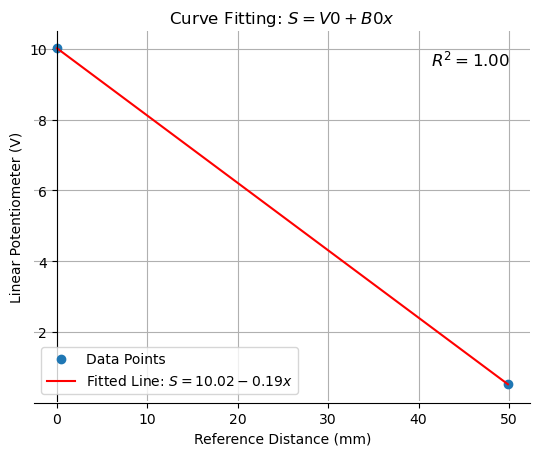

In [84]:
#define the model function to fit
def model_function(x, V0, B0):
    #S = a + be^(cx)
    return  V0 + B0*x

#Initial guess
initial_guess = [1, -1]

# Use curve_fit to fit the model to the data
popt, pcov = curve_fit(model_function, endpoints_df['Reference Distance (mm)'], endpoints_df['Linear Potentiometer (V)'], p0=initial_guess)

# Get the fitted parameters
V0_2, B0_2 = popt

# Formatted to 2 decimal places
V0_formatted = f'{V0_2:.2f}'
B0_formatted = f'{B0_2:.2f}'

# Calculate the fitted values using the original x-values
y_fit = model_function(endpoints_df['Reference Distance (mm)'], *popt)

# Calculate R^2 score manually
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

r2 = r2_score(endpoints_df['Linear Potentiometer (V)'], y_fit)
r2_formatted = f'{r2:.2f}'

# Print fitted parameters and R^2 score
print(f"Fitted parameters: V0 = {V0_2}, B0 = {B0_2}")
print(f"R^2 score: {r2_formatted}")

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the data points and fitted curve
ax.plot(endpoints_df['Reference Distance (mm)'], endpoints_df['Linear Potentiometer (V)'], marker='o', label='Data Points', linestyle='none')
ax.plot(endpoints_df['Reference Distance (mm)'], y_fit, label=rf'Fitted Line: $S = {V0_formatted} {B0_formatted} x$', color='red')

# Move the x-axis and y-axis to intersect at zero
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Hide the top and right spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Set limits to ensure visibility
# ax.set_xlim(min(dataset['distance (mm)']) - 0.05, max(dataset['distance (mm)']) + 0.2)
# ax.set_ylim(min(dataset['Signal (V)']) - 2, max(dataset['Signal (V)']) + 1)

# Set labels and title
ax.set_xlabel('Reference Distance (mm)')
ax.set_ylabel('Linear Potentiometer (V)')
ax.set_title(rf'Curve Fitting: $S = V0 + B0x$')

# Show the grid
ax.grid(True)

# Add the R^2 score as text annotation
ax.text(0.8, 0.9, f'$R^2 = {r2_formatted}$', transform=ax.transAxes, fontsize=12, verticalalignment='bottom')

# Display the legend
ax.legend(loc = 'lower left')

# Show the plot
plt.show()

In [102]:
# Create linear values based on the line of best fit
# Linear potentiometer; end point equation => 10.02 - 0.19x

LinPot_datapoints = []
LVIT_datapoints = []
LinPot_diff = []
LVIT_diff = []
LinPot_Range = abs(averages['Linear Potentiometer (V)'][0] - averages['Linear Potentiometer (V)'][9])
LVIT_Range = abs(averages['LVIT (V)'][0] - averages['LVIT (V)'][9])
LinPot_linearityError = []
LVIT_linearityError = []

for i in range(0, len(averages['Reference Distance (mm)'])):
    LVIT_datapoints.append((V0_1 + (B0_1 * averages['Reference Distance (mm)'][i])).round(6))

for i in range(0, len(averages['Reference Distance (mm)'])):
    LinPot_datapoints.append((V0_2 + (B0_2 * averages['Reference Distance (mm)'][i])).round(6))

# Add columns to current dataframe
averages['Linear LinPot (V)'] = LinPot_datapoints
averages['Linear LVIT (V)'] = LVIT_datapoints

for i in range(0, len(averages['Reference Distance (mm)'])):
    LVIT_diff.append(abs(averages['Linear Potentiometer (V)'][i] - averages['Linear LinPot (V)'][i]).round(6))

for i in range(0, len(averages['Reference Distance (mm)'])):
    LinPot_diff.append(abs(averages['LVIT (V)'][i] - averages['Linear LVIT (V)'][i]).round(6))

averages['LinPot Diff (V)'] = LinPot_diff
averages['LVIT Diff (V)'] = LVIT_diff

for i in range(0, len(averages['Reference Distance (mm)'])):
    LinPot_linearityError.append(100*(averages['LinPot Diff (V)'][i]/LinPot_Range).round(6))

for i in range(0, len(averages['Reference Distance (mm)'])):
    LVIT_linearityError.append(100*(averages['LVIT Diff (V)'][i]/LVIT_Range).round(6))

averages['LinPot NonLinearity Error (V)'] = LinPot_linearityError
averages['LVIT NonLinearity Error (V)'] = LVIT_linearityError

Calculate  and  plot  the  absolute  non-linearity  errors  as  a  function  of  position.  Determine  the 
maximum  absolute  non-linearity  error  for  each  sensor  signal  and  use  it  to  estimate  a  position 
error.

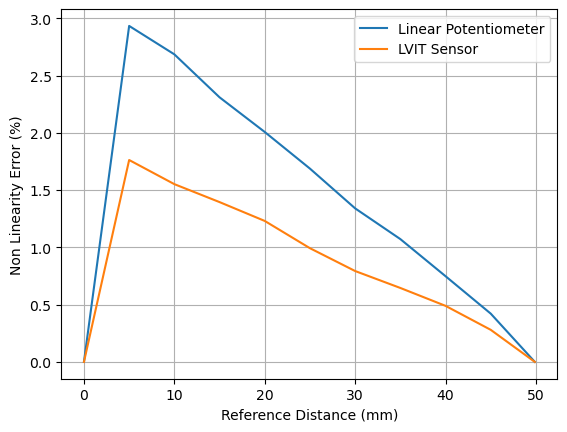

In [108]:
plt.plot(averages['Reference Distance (mm)'], averages['LinPot NonLinearity Error (V)'], label = 'Linear Potentiometer')
plt.plot(averages['Reference Distance (mm)'], averages['LVIT NonLinearity Error (V)'], label = 'LVIT Sensor')
plt.xlabel('Reference Distance (mm)')
plt.ylabel('Non Linearity Error (%)')
plt.legend()
plt.grid()
plt.show()